In [1]:
from jsontools import *

In [2]:
question_list = import_json('json','Hebdomadaire')

In [3]:
question_list

  'answered': 'true',
    'min-max': [0, 10],
    'root': ['root'],
    'required': 'true',
    'ordre': 3},
   'agitation_tension_emotionnelle_maximum': {'value': 8,
    'answered': 'true',
    'min-max': [0, 10],
    'root': ['root'],
    'required': 'false',
    'ordre': 4},
   'bonne_semaine': {'value': 10,
    'answered': 'true',
    'min-max': [0, 10],
    'root': ['root'],
    'required': 'false',
    'ordre': 5},
   'bien_etre': {'value': 9,
    'answered': 'true',
    'min-max': [0, 10],
    'root': ['root'],
    'required': 'false',
    'ordre': 12},
   'satisfaction_relations_familiales': {'value': 10,
    'answered': 'false',
    'min-max': [0, 10],
    'root': ['root', 'satisfaction_relations_familiales_sans_contact'],
    'required': 'false',
    'ordre': 0},
   'satisfaction_relations_couple': {'value': 0,
    'answered': 'false',
    'min-max': [0, 10],
    'root': ['root', 'satisfaction_relations_sans_couple'],
    'required': 'false',
    'ordre': 0},
   'satisfaction

In [4]:
answ_number = fetch_mean('Range',question_list)

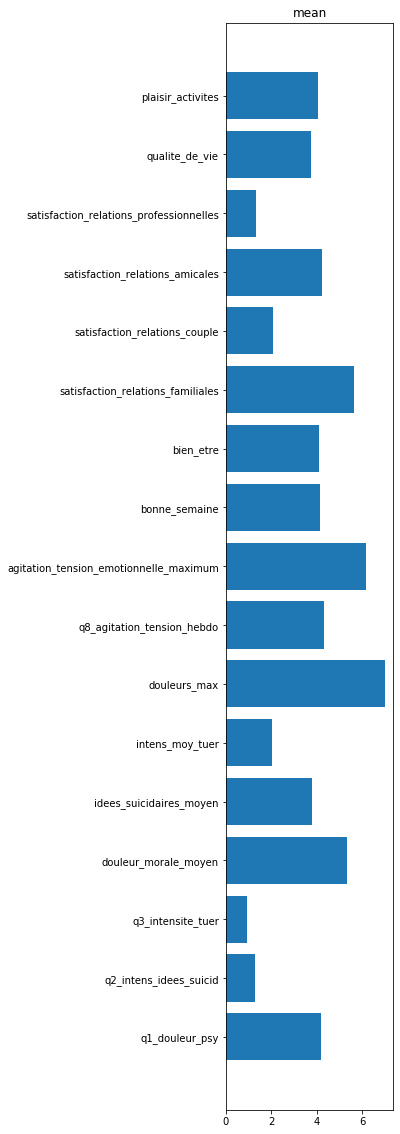

In [5]:
unpack(answ_number,'mean')

In [6]:
question = retrieve_path(question_list)

In [7]:
tree = build_tree(question)

In [8]:
tree_object = recur_tree(tree)

In [9]:
display_tree(tree_object)

root
├── satisfaction_relations_professionnelles_sans_contact
├── satisfaction_relations_familiales_sans_contact
├── satisfaction_relations_sans_couple
├── urgences_psychiatriques
├── satisfaction_relations_amicales_sans_contact
├── conflits
│   └── conflits_type
├── comportements_suicidaires
│   └── comportements_suicidaires_facteurs_declenchants
│       └── comportements_suicidaires_aide
├── evenement_negatif
├── hospitalisation
├── q1_douleur_psy
└── douleur_morale_moyen


In [10]:
type_question,pourc = stat_pourc_total(question_list)

In [11]:
type_question

{'Range': {'True': 603, 'Total': 1207},
 'Checkbox': {'True': 64, 'Total': 426},
 'YesNo': {'True': 265, 'Total': 781},
 'Text': {'True': 157, 'Total': 639},
 'Input': {'True': 107, 'Total': 142},
 'Contact': {'True': 0, 'Total': 71}}

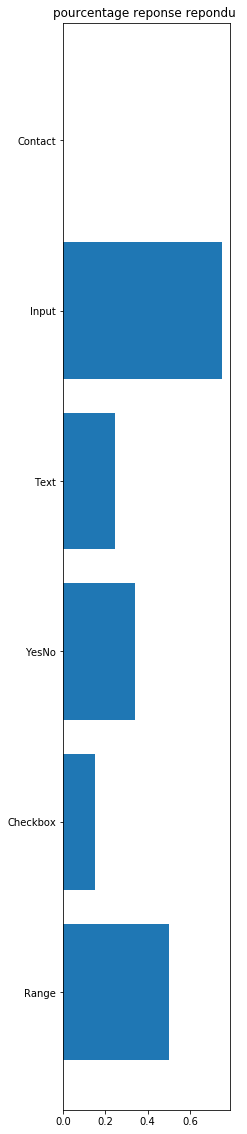

In [13]:
unpack(pourc ,'pourcentage reponse repondu ')

In [12]:
pourc

{'Range': 0.4995857497928749,
 'Checkbox': 0.15023474178403756,
 'YesNo': 0.3393085787451985,
 'Text': 0.24569640062597808,
 'Input': 0.7535211267605634,
 'Contact': 0.0}

In [14]:
type_question,pourc = stat_pourc_unite(question_list)

In [15]:
type_question

{'bcc08': {'Range': {'True': 9, 'Total': 17},
  'Checkbox': {'True': 0, 'Total': 6},
  'YesNo': {'True': 3, 'Total': 11},
  'Text': {'True': 3, 'Total': 9},
  'Input': {'True': 2, 'Total': 2},
  'Contact': {'True': 0, 'Total': 1}},
 'bcm03': {'Range': {'True': 9, 'Total': 17},
  'Checkbox': {'True': 0, 'Total': 6},
  'YesNo': {'True': 1, 'Total': 11},
  'Text': {'True': 0, 'Total': 9},
  'Input': {'True': 2, 'Total': 2},
  'Contact': {'True': 0, 'Total': 1}},
 'bda04': {'Range': {'True': 9, 'Total': 17},
  'Checkbox': {'True': 2, 'Total': 6},
  'YesNo': {'True': 5, 'Total': 11},
  'Text': {'True': 3, 'Total': 9},
  'Input': {'True': 2, 'Total': 2},
  'Contact': {'True': 0, 'Total': 1}},
 'bmf02': {'Range': {'True': 9, 'Total': 17},
  'Checkbox': {'True': 2, 'Total': 6},
  'YesNo': {'True': 2, 'Total': 11},
  'Text': {'True': 3, 'Total': 9},
  'Input': {'True': 1, 'Total': 2},
  'Contact': {'True': 0, 'Total': 1}},
 'bmm01': {'Range': {'True': 9, 'Total': 17},
  'Checkbox': {'True': 0, 

In [16]:
pourc

{'bcc08': {'Range': 0.5294117647058824,
  'Checkbox': 0.0,
  'YesNo': 0.2727272727272727,
  'Text': 0.3333333333333333,
  'Input': 1.0,
  'Contact': 0.0},
 'bcm03': {'Range': 0.5294117647058824,
  'Checkbox': 0.0,
  'YesNo': 0.09090909090909091,
  'Text': 0.0,
  'Input': 1.0,
  'Contact': 0.0},
 'bda04': {'Range': 0.5294117647058824,
  'Checkbox': 0.3333333333333333,
  'YesNo': 0.45454545454545453,
  'Text': 0.3333333333333333,
  'Input': 1.0,
  'Contact': 0.0},
 'bmf02': {'Range': 0.5294117647058824,
  'Checkbox': 0.3333333333333333,
  'YesNo': 0.18181818181818182,
  'Text': 0.3333333333333333,
  'Input': 0.5,
  'Contact': 0.0},
 'bmm01': {'Range': 0.5294117647058824,
  'Checkbox': 0.0,
  'YesNo': 0.36363636363636365,
  'Text': 0.3333333333333333,
  'Input': 1.0,
  'Contact': 0.0},
 'bss05': {'Range': 0.47058823529411764,
  'Checkbox': 0.0,
  'YesNo': 0.2727272727272727,
  'Text': 0.2222222222222222,
  'Input': 1.0,
  'Contact': 0.0},
 'cca01': {'Range': 0.5294117647058824,
  'Checkbo

In [17]:
type_question,pourc= stat_pourc_required_total(question_list)

In [18]:
type_question

{'Range': {'True': 142, 'Total': 213},
 'Checkbox': {'True': 0, 'Total': 0},
 'YesNo': {'True': 0, 'Total': 0},
 'Text': {'True': 0, 'Total': 0},
 'Input': {'True': 0, 'Total': 0},
 'Contact': {'True': 0, 'Total': 0}}

In [19]:
pourc

{'Range': 0.6666666666666666,
 'Checkbox': 0,
 'YesNo': 0,
 'Text': 0,
 'Input': 0,
 'Contact': 0}

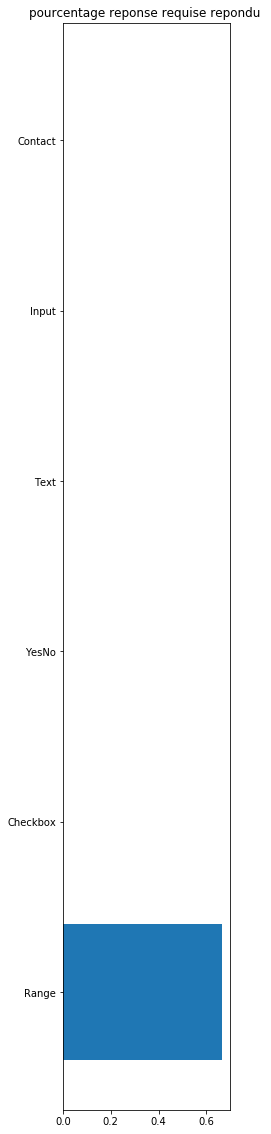

In [20]:
unpack(pourc ,'pourcentage reponse requise repondu ')

In [21]:
pourc_rep = pourcentage_rep(question_list)

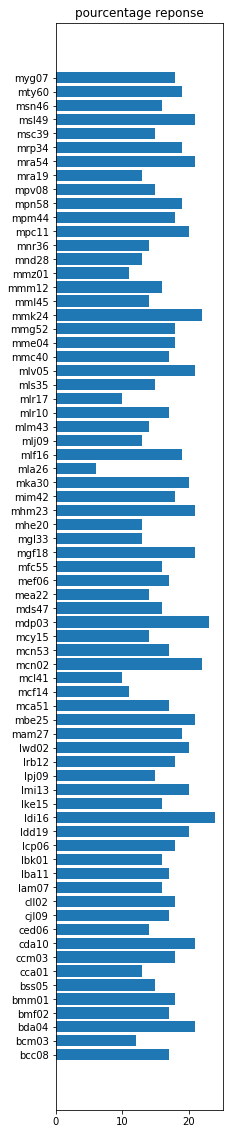

In [22]:
unpack(pourc_rep ,'pourcentage reponse')

In [23]:
question_list

  'answered': 'true',
    'min-max': [0, 10],
    'root': ['root'],
    'required': 'true',
    'ordre': 3},
   'agitation_tension_emotionnelle_maximum': {'value': 8,
    'answered': 'true',
    'min-max': [0, 10],
    'root': ['root'],
    'required': 'false',
    'ordre': 4},
   'bonne_semaine': {'value': 10,
    'answered': 'true',
    'min-max': [0, 10],
    'root': ['root'],
    'required': 'false',
    'ordre': 5},
   'bien_etre': {'value': 9,
    'answered': 'true',
    'min-max': [0, 10],
    'root': ['root'],
    'required': 'false',
    'ordre': 12},
   'satisfaction_relations_familiales': {'value': 10,
    'answered': 'false',
    'min-max': [0, 10],
    'root': ['root', 'satisfaction_relations_familiales_sans_contact'],
    'required': 'false',
    'ordre': 0},
   'satisfaction_relations_couple': {'value': 0,
    'answered': 'false',
    'min-max': [0, 10],
    'root': ['root', 'satisfaction_relations_sans_couple'],
    'required': 'false',
    'ordre': 0},
   'satisfaction

In [27]:
ordre = question_completion(question_list)
ordre

{'bcc08': [0, 1, 2, 3, 4, 5, 12, 19, 21, 14, 16, 25, 22, 23, 24, 13, 20],
 'bcm03': [0, 1, 2, 3, 4, 5, 12, 19, 21, 14, 13, 20],
 'bda04': [0,
  1,
  2,
  3,
  4,
  5,
  12,
  19,
  21,
  6,
  7,
  9,
  10,
  14,
  16,
  25,
  22,
  23,
  24,
  13,
  20],
 'bmf02': [0, 1, 2, 3, 4, 5, 12, 19, 21, 6, 7, 14, 16, 22, 23, 24, 13],
 'bmm01': [0, 1, 2, 3, 4, 5, 12, 19, 21, 14, 15, 16, 18, 22, 23, 24, 13, 20],
 'bss05': [0, 1, 2, 3, 4, 5, 12, 19, 14, 15, 16, 22, 23, 13, 20],
 'cca01': [0, 1, 2, 3, 4, 5, 12, 19, 21, 14, 23, 13, 20],
 'ccm03': [0, 1, 2, 3, 4, 5, 12, 19, 21, 14, 15, 16, 18, 22, 23, 24, 13, 20],
 'cda10': [0,
  1,
  2,
  3,
  4,
  5,
  12,
  19,
  21,
  6,
  7,
  9,
  10,
  14,
  15,
  16,
  22,
  23,
  24,
  13,
  20],
 'ced06': [0, 1, 2, 3, 4, 5, 12, 19, 21, 14, 15, 22, 23, 24],
 'cjl09': [0, 1, 2, 3, 4, 5, 12, 19, 21, 14, 15, 18, 22, 23, 24, 13, 20],
 'cll02': [0, 1, 2, 3, 4, 12, 19, 21, 6, 7, 9, 14, 16, 22, 23, 24, 13, 20],
 'lam07': [0, 1, 2, 3, 4, 5, 12, 19, 21, 6, 7, 9, 14, 

In [28]:
alignement = []

for element in ordre.values() :
    alignement.append(sorted(element))
alignement    


[[0, 1, 2, 3, 4, 5, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 25],
 [0, 1, 2, 3, 4, 5, 12, 13, 14, 19, 20, 21],
 [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 25],
 [0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 16, 19, 21, 22, 23, 24],
 [0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24],
 [0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 19, 20, 22, 23],
 [0, 1, 2, 3, 4, 5, 12, 13, 14, 19, 20, 21, 23],
 [0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24],
 [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24],
 [0, 1, 2, 3, 4, 5, 12, 14, 15, 19, 21, 22, 23, 24],
 [0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24],
 [0, 1, 2, 3, 4, 6, 7, 9, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24],
 [0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 14, 16, 17, 19, 20, 21],
 [0, 1, 2, 3, 4, 6, 7, 9, 10, 13, 14, 18, 20, 22, 23, 24, 25],
 [0, 1, 2, 3, 4, 5, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24],
 [0, 1, 2, 3, 4, 5, 11, 12, 13, 14, 16, 18, 19, 20, 21, 22, 

In [42]:
from matplotlib.colors import hsv_to_rgb
colors = [hsv_to_rgb([(i * 0.618033988749895) % 1.0, 1, 1])
          for i in range(1000)]

coord 0,0
coord 1,0
coord 2,0
coord 3,0
coord 4,0
coord 5,0
coord 12,0
coord 13,0
coord 14,0
coord 16,0
coord 19,0
coord 20,0
coord 21,0
coord 22,0
coord 23,0
coord 24,0
coord 25,0
********
coord 0,1
coord 1,1
coord 2,1
coord 3,1
coord 4,1
coord 5,1
coord 12,1
coord 13,1
coord 14,1
coord 19,1
coord 20,1
coord 21,1
********
coord 0,2
coord 1,2
coord 2,2
coord 3,2
coord 4,2
coord 5,2
coord 6,2
coord 7,2
coord 9,2
coord 10,2
coord 12,2
coord 13,2
coord 14,2
coord 16,2
coord 19,2
coord 20,2
coord 21,2
coord 22,2
coord 23,2
coord 24,2
coord 25,2
********
coord 0,3
coord 1,3
coord 2,3
coord 3,3
coord 4,3
coord 5,3
coord 6,3
coord 7,3
coord 12,3
coord 13,3
coord 14,3
coord 16,3
coord 19,3
coord 21,3
coord 22,3
coord 23,3
coord 24,3
********
coord 0,4
coord 1,4
coord 2,4
coord 3,4
coord 4,4
coord 5,4
coord 12,4
coord 13,4
coord 14,4
coord 15,4
coord 16,4
coord 18,4
coord 19,4
coord 20,4
coord 21,4
coord 22,4
coord 23,4
coord 24,4
********
coord 0,5
coord 1,5
coord 2,5
coord 3,5
coord 4,5
coord

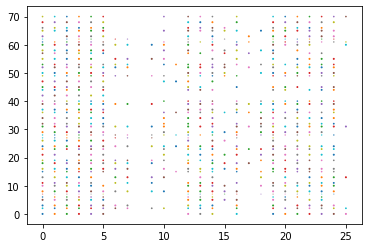

In [46]:
plt()
for index,personne in enumerate(alignement) :
    for point in personne :
        plt.scatter(point,index,colors[index])
        print('coord {},{}'.format(point,index))
    print('*'*8)

